In [1]:
import pandas as pd

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

# Data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [4]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [5]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64')

You can access the underlying numpy array representation with the `.values` attribute:

In [6]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

We can access series values via the index, just like for NumPy arrays:

In [7]:
s[0]

0.10000000000000001

Unlike the NumPy array, though, this index can be something other than integers:

In [8]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [9]:
s2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [10]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

We can index the populations like a dict as expected:

In [11]:
population['France']

64.299999999999997

but with the power of numpy arrays:

In [12]:
population * 1000

Belgium           11300
France            64300
Germany           81300
Netherlands       16900
United Kingdom    64900
dtype: float64

Many things we have seen for numpy, can also be used with pandas objects.

Slicing:

In [13]:
population['Belgium':'Germany']

Belgium    11.3
France     64.3
Germany    81.3
dtype: float64

Fancy indexing, like indexing with a list or boolean indexing:

In [14]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [15]:
population[population > 20]

France            64.3
Germany           81.3
United Kingdom    64.9
dtype: float64

Element-wise operations:

In [16]:
population / 100

Belgium           0.113
France            0.643
Germany           0.813
Netherlands       0.169
United Kingdom    0.649
dtype: float64

A range of methods:

In [17]:
population.mean()

47.739999999999995

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the population numbers relative to Belgium
</div>

In [18]:
population / population['Belgium'].mean()

Belgium           1.000000
France            5.690265
Germany           7.194690
Netherlands       1.495575
United Kingdom    5.743363
dtype: float64

### Alignment!

Only, pay attention to **alignment**: operations between series will align on the index:  

In [19]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [20]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [21]:
s2

France     64.3
Germany    81.3
dtype: float64

In [22]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="img/dataframe.png" width=110%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [23]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [24]:
countries.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [25]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

To check the data types of the different columns:

In [26]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [27]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 160.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [28]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [29]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


To access a Series representing a column in the data, use typical indexing syntax:

In [30]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

For example there's arithmetic. Let's compute density of each country:

In [31]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

Adding a new column to the dataframe is very simple:

In [32]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


We can use masking the way we did in NumPy to select certain data:

In [33]:
countries[countries['density'] > 300]

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
Netherlands,41526,Amsterdam,16.9,406.973944


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [34]:
countries.sort('density', ascending=False)

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370
United Kingdom,244820,London,64.9,265.092721
Germany,357050,Berlin,81.3,227.699202
France,671308,Paris,64.3,95.783158


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [35]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


The `plot` method can be used to quickly visualize the data in different ways:

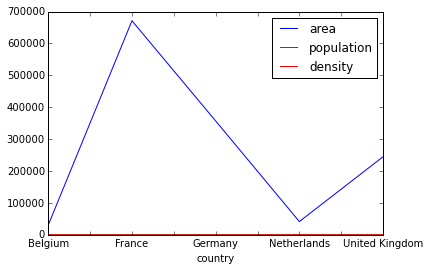

In [36]:
countries.plot()

However, for this dataset, it does not say that much:

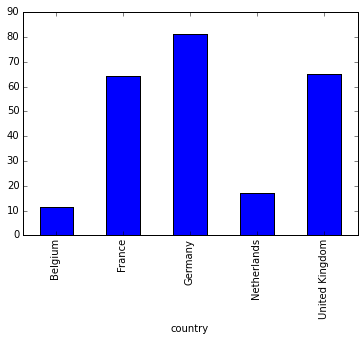

In [37]:
countries['population'].plot(kind='bar')

You can play with the `kind` keyword: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'

## Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [ ]:
pd.read

In [ ]:
states.to

## Other features

* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Time series manipulation (resampling, timezones, ..)
* Easy plotting

There are many, many more interesting operations that can be done on Series and DataFrame objects, but rather than continue using this toy data, we'll instead move to a real-world example, and illustrate some of the advanced concepts along the way.

See the next notebooks!

## Acknowledgement

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---